# Assessment - 2 

# Name: Bhuwan Rathi 
## Reg. No: 20BCE2808

Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding 
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not 
enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upper class.
The problem associated with the Titanic dataset is to predict whether a passenger survived the 
disaster or not. The dataset contains various features such as passenger class, age, gender, 
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can 
be used to build a predictive model to determine the likelihood of a passenger surviving the 
disaster. The dataset offers opportunities for feature engineering, data visualization, and model 
selection, making it a valuable resource for developing and testing data analysis and machine 
learning skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [2]:
# Load the dataset
df = pd.read_csv('titanic.csv')

In [3]:
#printing the first 10 values
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#printing the information about the Data Frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


## Data Visualization
### Univariate Analysis

Alive  342
Dead  549
Survival Rate:  0.38 :1


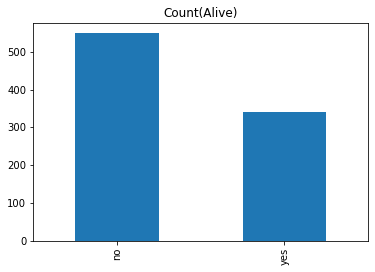

In [5]:
#Bar Plot for target Variable: Alive
targ_cnt=df.alive.value_counts()
print('Alive ',targ_cnt[1])
print('Dead ',targ_cnt[0])
print('Survival Rate: ',round(targ_cnt[1]/(targ_cnt[0]+targ_cnt[1]),2),':1')
targ_cnt.plot(kind='bar',title='Count(Alive)')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

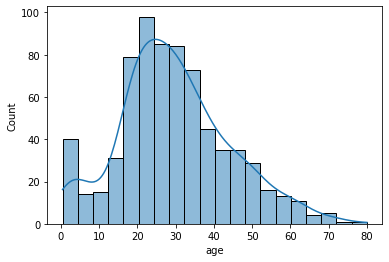

In [6]:
#histogram for age
sns.histplot(df.age,kde=True)

C:\Users\91969\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

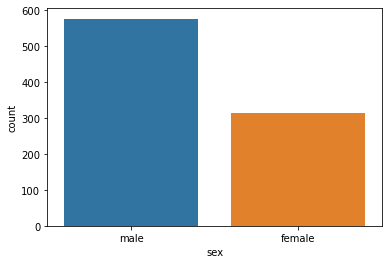

In [7]:
#countplot for various attributes
sns.countplot(df.sex)

C:\Users\91969\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

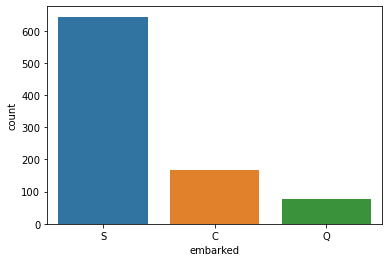

In [8]:
sns.countplot(df.embarked)

C:\Users\91969\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='who', ylabel='count'>

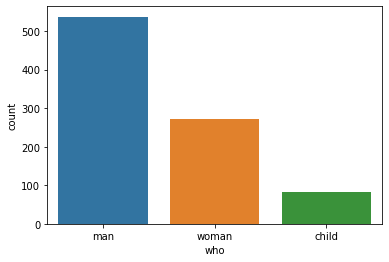

In [9]:
sns.countplot(df.who)

## Bi-Variate Analysis

In [10]:
#finding correlation among numerical data
df[['age', 'fare', 'pclass', 'survived', 'parch','sibsp']].corr()

,age,fare,pclass,survived,parch,sibsp
age,1.000000,0.096067,-0.369226,-0.077221,-0.189119,-0.308247
fare,0.096067,1.000000,-0.549500,0.257307,0.216225,0.159651
pclass,-0.369226,-0.549500,1.000000,-0.338481,0.018443,0.083081
survived,-0.077221,0.257307,-0.338481,1.000000,0.081629,-0.035322
parch,-0.189119,0.216225,0.018443,0.081629,1.000000,0.414838
sibsp,-0.308247,0.159651,0.083081,-0.035322,0.414838,1.000000


C:\Users\91969\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 300.0)

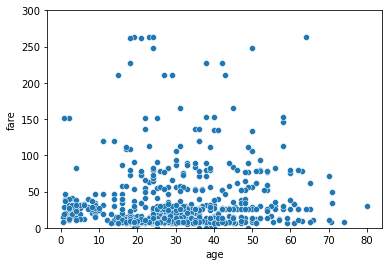

In [11]:
#scatterplot between fare and age
sns.scatterplot(df.age, df.fare)

plt.ylim(0,300)

In [12]:
#bi-variate analysis between alive and other numericl data
df.groupby(by="alive").agg("mean")[['age', 'fare', 'pclass', 'survived', 'parch','sibsp']]

,age,fare,pclass,survived,parch,sibsp
alive,,,,,,
no,30.626179,22.117887,2.531876,0.0,0.329690,0.553734
yes,28.343690,48.395408,1.950292,1.0,0.464912,0.473684


<AxesSubplot:xlabel='age', ylabel='Density'>

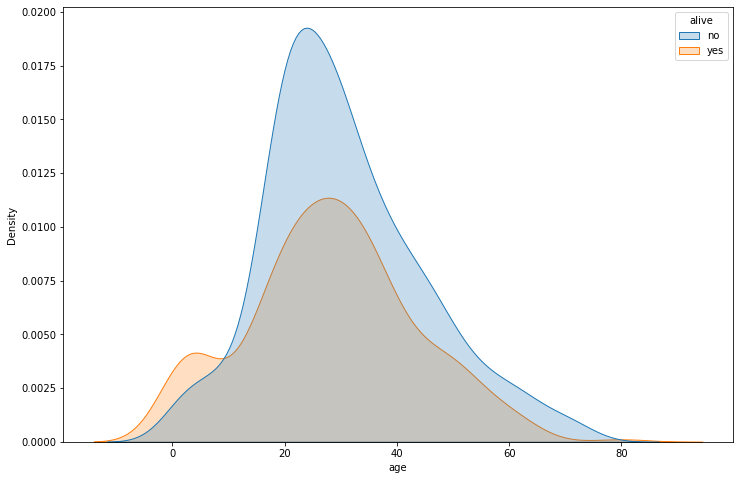

In [13]:
#kdeplot visualization for all numerical attributes with target attribute
plt.figure(figsize=(12,8))

sns.kdeplot(data=df, x= 'age',hue='alive',fill=True)

<AxesSubplot:xlabel='pclass', ylabel='Density'>

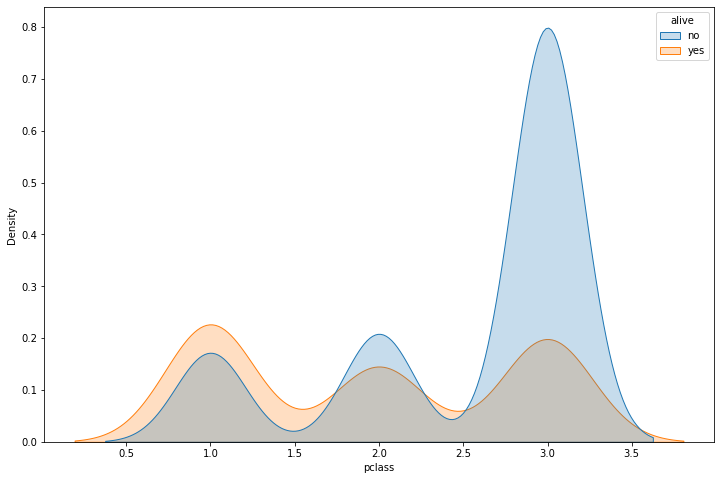

In [14]:
plt.figure(figsize=(12,8))

sns.kdeplot(data=df, x= 'pclass',hue='alive',fill=True)

<AxesSubplot:xlabel='sibsp', ylabel='Density'>

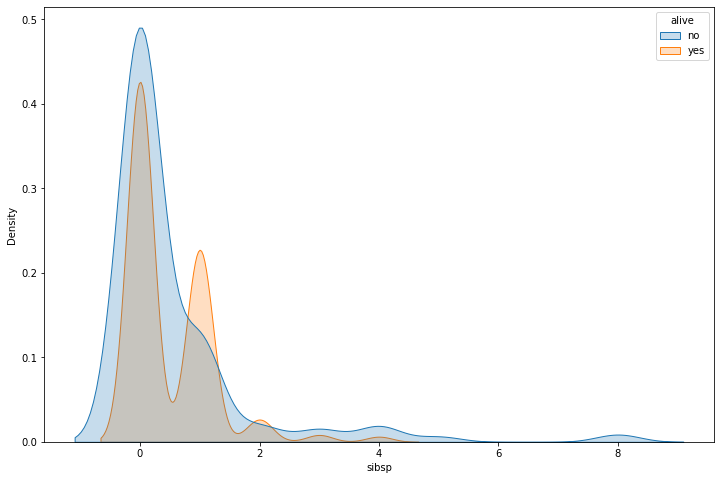

In [15]:
plt.figure(figsize=(12,8))

sns.kdeplot(data=df, x= 'sibsp',hue='alive',fill=True)

<AxesSubplot:xlabel='parch', ylabel='Density'>

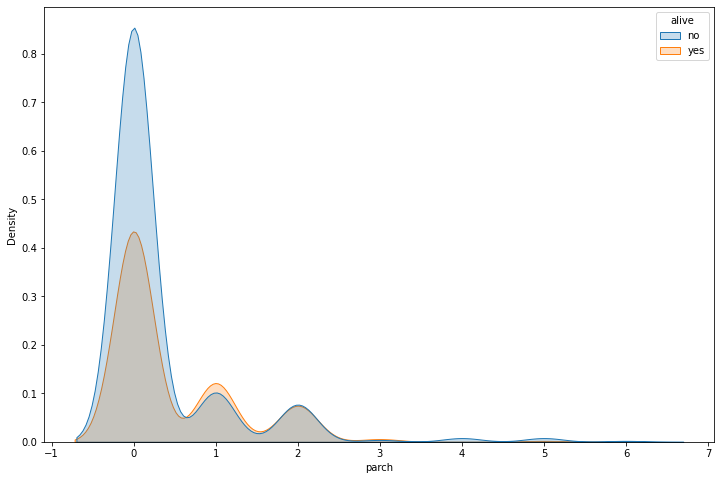

In [16]:
plt.figure(figsize=(12,8))

sns.kdeplot(data=df, x= 'parch',hue='alive',fill=True)

<AxesSubplot:xlabel='alive', ylabel='count'>

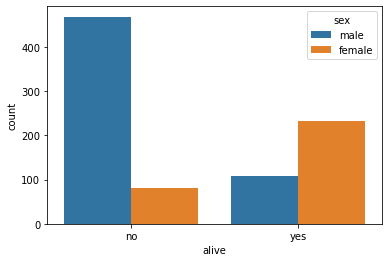

In [17]:
#count plots for all categorical attributes with target attribute
sns.countplot(data=df,x='alive',hue='sex')

<AxesSubplot:xlabel='alive', ylabel='count'>

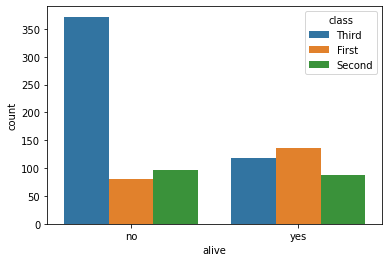

In [18]:
sns.countplot(data=df,x='alive',hue='class')

<AxesSubplot:xlabel='alive', ylabel='count'>

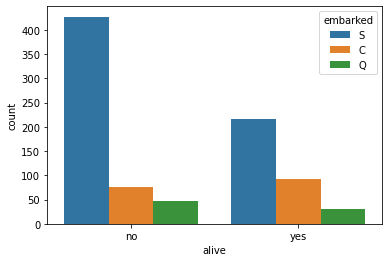

In [19]:
sns.countplot(data=df,x='alive',hue='embarked')

<AxesSubplot:xlabel='alive', ylabel='count'>

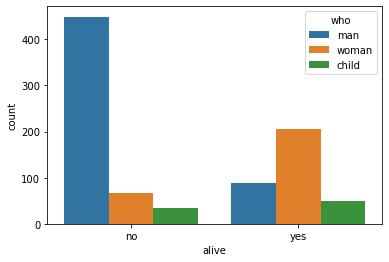

In [20]:
sns.countplot(data=df,x='alive',hue='who')

<AxesSubplot:xlabel='alive', ylabel='count'>

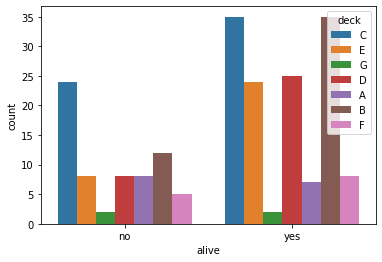

In [21]:
sns.countplot(data=df,x='alive',hue='deck')

## Multi Variate Analysis

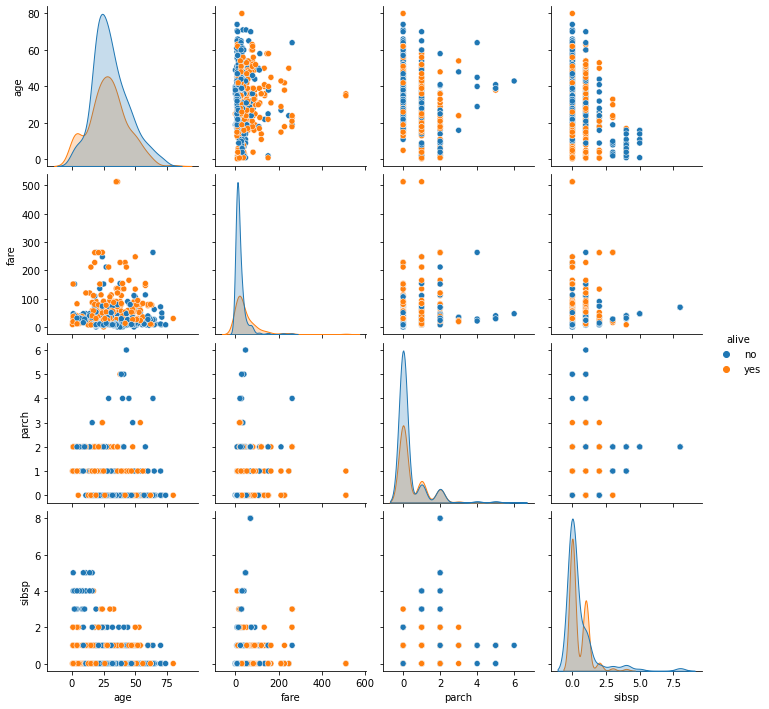

In [22]:
#pairplot
sns.pairplot(data=df[['age', 'fare', 'parch','sibsp','alive']],hue='alive')

<AxesSubplot:>

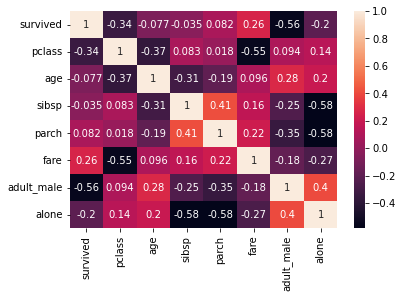

In [23]:
#heatmap
sns.heatmap(df.corr(), annot=True)

## Performing Descriptive Statistic on the dataset

In [24]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
pd.get_dummies(df)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
888,0,3,NaN,1,2,23.4500,False,False,1,0,...,0,0,0,0,0,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,True,True,0,1,...,1,0,0,0,0,1,0,0,0,1


In [26]:
np.mean(df)

C:\Users\91969\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\91969\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

## Handling Missing Data

In [27]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
df1 = pd.read_csv('titanic.csv')
df2= pd.read_csv('titanic.csv')
df3 = pd.read_csv('titanic.csv')
df4= pd.read_csv('titanic.csv')
df5=pd.read_csv('titanic.csv')


In [29]:
#METHOD:1 DROP ALL ROWS WITH MISSING VALUE
df1.dropna(inplace= True)
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [30]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [31]:
#METHOD:2 REPLACE WITH MEAN/MEDIAN/MODE
#MEAN
df2['age'].mean()

29.69911764705882

In [32]:
df2['age'].replace(np.NaN,df2['age'].mean()).head(30)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
Name: age, dtype: float64

In [33]:
#MEDIAN
K=df3['age'].median()
K

28.0

In [34]:
df3['age'].replace(np.NaN,K).head(30)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     28.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    28.0
18    31.0
19    28.0
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26    28.0
27    19.0
28    28.0
29    28.0
Name: age, dtype: float64

In [35]:
#MODE
K1=df4['age'].mode()
K1

0    24.0
Name: age, dtype: float64

In [36]:
df4['age'].replace(np.NaN,24).head(30)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     24.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    24.0
18    31.0
19    24.0
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26    24.0
27    19.0
28    24.0
29    24.0
Name: age, dtype: float64

In [37]:
df3['deck'].head(30)

0     NaN
1       C
2     NaN
3       C
4     NaN
5     NaN
6       E
7     NaN
8     NaN
9     NaN
10      G
11      C
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21      D
22    NaN
23      A
24    NaN
25    NaN
26    NaN
27      C
28    NaN
29    NaN
Name: deck, dtype: object

In [38]:
df['deck']=df3['deck'].fillna('NO')
df['age']=df3['age'].replace(np.NaN,K)

## Final Data Frame after Handling Missing Values

In [39]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NO,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NO,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NO,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NO,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NO,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Handling Outliers

C:\Users\91969\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

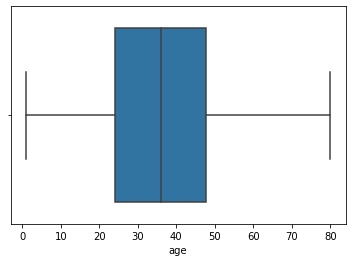

In [40]:
#OUTLIER HANDLING
sns.boxplot(df1['age'])

In [41]:
np.where(df1['age']>62)

(array([  9,  15,  50,  85,  90, 128, 155], dtype=int64),)

In [42]:
from scipy import stats
z = np.abs(stats.zscore(df['age']))
z

0      0.565736
1      0.663861
2      0.258337
3      0.433312
4      0.433312
         ...   
886    0.181487
887    0.796286
888    0.104637
889    0.258337
890    0.202762
Name: age, Length: 891, dtype: float64

In [43]:
np.where(z > 2)

(array([  7,  11,  16,  33,  43,  54,  78,  94,  96, 116, 119, 152, 164,
        170, 172, 174, 183, 193, 195, 205, 232, 252, 261, 268, 275, 280,
        297, 305, 326, 340, 348, 366, 374, 381, 386, 407, 438, 456, 467,
        469, 479, 483, 487, 493, 530, 545, 555, 570, 587, 625, 626, 630,
        642, 644, 647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824,
        827, 829, 831, 851, 879], dtype=int64),)

In [44]:
Q1 = np.percentile(df['age'], 25)
Q3 = np.percentile(df['age'], 75)
IQR = Q3 - Q1

In [45]:
upper=Q3+1.5*IQR
upper_array=np.array(df['age']>=upper)
print("Upper Bound:",upper)

lower=Q1-1.5*IQR
lower_array=np.array(df['age']<=lower)
print("Lower Bound:",lower)


Upper Bound: 54.5
Lower Bound: 2.5


## Checking for Categorical columns and perform encoding.

In [46]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [47]:
# Print the categorical columns
print("Categorical columns:")
for column in categorical_columns:
    print(column)

Categorical columns:
sex
embarked
class
who
deck
embark_town
alive


In [48]:
# Perform encoding for categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_columns)

In [49]:
# Print the encoded dataframe
print("\nEncoded dataframe:")
print(encoded_df)


Encoded dataframe:
     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0           0       3  22.0      1      0   7.2500        True  False   
1           1       1  38.0      1      0  71.2833       False  False   
2           1       3  26.0      0      0   7.9250       False   True   
3           1       1  35.0      1      0  53.1000       False  False   
4           0       3  35.0      0      0   8.0500        True   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
886         0       2  27.0      0      0  13.0000        True   True   
887         1       1  19.0      0      0  30.0000       False   True   
888         0       3  28.0      1      2  23.4500       False  False   
889         1       1  26.0      0      0  30.0000        True   True   
890         0       3  32.0      0      0   7.7500        True   True   

     sex_female  sex_male  ...  deck_D  deck_E  deck_F  deck_G  deck_NO  \
0             0         1  .

##  Spliting the data into dependent and independent variables.

In [50]:
# Split into dependent and independent variables
X = df.drop('survived', axis=1)  # Independent variables (all columns except 'survived')
y = df['survived']  # Dependent variable ('survived' column)

In [51]:
# Print the independent variables (X)
print("Independent variables:")
print(X)

Independent variables:
     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
0         3    male  22.0      1      0   7.2500        S   Third    man   
1         1  female  38.0      1      0  71.2833        C   First  woman   
2         3  female  26.0      0      0   7.9250        S   Third  woman   
3         1  female  35.0      1      0  53.1000        S   First  woman   
4         3    male  35.0      0      0   8.0500        S   Third    man   
..      ...     ...   ...    ...    ...      ...      ...     ...    ...   
886       2    male  27.0      0      0  13.0000        S  Second    man   
887       1  female  19.0      0      0  30.0000        S   First  woman   
888       3  female  28.0      1      2  23.4500        S   Third  woman   
889       1    male  26.0      0      0  30.0000        C   First    man   
890       3    male  32.0      0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  alone  
0          True

In [52]:
# Print the dependent variable (y)
print("\nDependent variable:")
print(y)


Dependent variable:
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


##  Scaling the independent variables

In [53]:
# Splitting the data into dependent and independent variables
dependent_variable = df['survived']  # Assuming 'survived' is the dependent variable
independent_variables = df.drop('survived', axis=1)

In [54]:
# Scaling the independent variables
scaled_independent_variables = (independent_variables - independent_variables.mean()) / independent_variables.std()

C:\Users\91969\AppData\Local\Temp\ipykernel_24012\2236090354.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  scaled_independent_variables = (independent_variables - independent_variables.mean()) / independent_variables.std()
C:\Users\91969\AppData\Local\Temp\ipykernel_24012\2236090354.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  scaled_independent_variables = (independent_variables - independent_variables.mean()) / independent_variables.std()


In [55]:
# Printing the scaled independent variables
print("Scaled independent variables:")
print(scaled_independent_variables)

Scaled independent variables:
     adult_male       age alive     alone class deck embark_town embarked  \
0      0.811467 -0.565419   NaN -1.230954   NaN  NaN         NaN      NaN   
1     -1.230954  0.663488   NaN -1.230954   NaN  NaN         NaN      NaN   
2     -1.230954 -0.258192   NaN  0.811467   NaN  NaN         NaN      NaN   
3     -1.230954  0.433068   NaN -1.230954   NaN  NaN         NaN      NaN   
4      0.811467  0.433068   NaN  0.811467   NaN  NaN         NaN      NaN   
..          ...       ...   ...       ...   ...  ...         ...      ...   
886    0.811467 -0.181385   NaN  0.811467   NaN  NaN         NaN      NaN   
887   -1.230954 -0.795839   NaN  0.811467   NaN  NaN         NaN      NaN   
888   -1.230954 -0.104579   NaN -1.230954   NaN  NaN         NaN      NaN   
889    0.811467 -0.258192   NaN  0.811467   NaN  NaN         NaN      NaN   
890    0.811467  0.202648   NaN  0.811467   NaN  NaN         NaN      NaN   

         fare     parch    pclass  sex     si

## Spliting the data into training and testing


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape) 

Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)
